<a href="https://colab.research.google.com/github/ghazalna/Deep-Learning/blob/main/Overfit_ASH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [5]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
#number of pictues, Dim.
X_train.shape

(60000, 28, 28)

## **Flatting and Normalization**

In [7]:
X_train = X_train.reshape(-1, 784).astype('float32') / 255.0
X_test = X_test.reshape(-1, 784).astype('float32') / 255.0Y_train

In [8]:
X_train.shape

(60000, 784)

In [9]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [14]:
 y_train[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

## **Model Architecture**

In [15]:
#Define model architecture parameters
input_num_units = 784
hidden1_num_units = 500
hidden2_num_units = 500
hidden3_num_units = 500
hidden4_num_units = 500
hidden5_num_units = 500
output_num_units = 10
epochs = 10
batch_size = 128



In [16]:
# Simple model
model_simple = Sequential([
    Dense(hidden1_num_units, input_dim = input_num_units, activation = 'relu'),
    Dense(hidden2_num_units, activation = 'relu'),
    Dense(hidden3_num_units, activation = 'relu'),
    Dense(hidden4_num_units, activation = 'relu'),
    Dense(hidden5_num_units, activation = 'relu'),
    Dense(output_num_units, activation = 'softmax')
])

In [17]:
model_simple.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
history_simple = model_simple.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 26s 47ms/step - loss: 0.2324 - accuracy: 0.9278 - val_loss: 0.1025 - val_accuracy: 0.9675
Epoch 2/10
469/469 [==============================] - 18s 38ms/step - loss: 0.0941 - accuracy: 0.9716 - val_loss: 0.1069 - val_accuracy: 0.9700
Epoch 3/10
469/469 [==============================] - 18s 38ms/step - loss: 0.0682 - accuracy: 0.9794 - val_loss: 0.0967 - val_accuracy: 0.9729
Epoch 4/10
469/469 [==============================] - 19s 41ms/step - loss: 0.0551 - accuracy: 0.9837 - val_loss: 0.0812 - val_accuracy: 0.9784
Epoch 5/10
469/469 [==============================] - 18s 39ms/step - loss: 0.0441 - accuracy: 0.9869 - val_loss: 0.0829 - val_accuracy: 0.9781
Epoch 6/10
469/469 [==============================] - 18s 39ms/step - loss: 0.0355 - accuracy: 0.9893 - val_loss: 0.0865 - val_accuracy: 0.9785
Epoch 7/10
469/469 [==============================] - 19s 41ms/step - loss: 0.0351 - accuracy: 0.9898 - val_loss: 0.0741 - val_accuracy:

In [23]:
# 2. Neural Network with L2 Regularization
model_l2 = Sequential([
    Dense(hidden1_num_units, input_dim = input_num_units, activation = 'relu',kernel_regularizer=regularizers.l2(0.0001)),
    Dense(hidden2_num_units, activation = 'relu',kernel_regularizer=regularizers.l2(0.0001)),
    Dense(hidden3_num_units, activation = 'relu',kernel_regularizer=regularizers.l2(0.0001)),
    Dense(hidden4_num_units, activation = 'relu',kernel_regularizer=regularizers.l2(0.0001)),
    Dense(hidden5_num_units, activation = 'relu',kernel_regularizer=regularizers.l2(0.0001)),
    Dense(output_num_units, activation = 'softmax')
])

model_l2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_l2= model_l2.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 23s 47ms/step - loss: 0.4184 - accuracy: 0.9282 - val_loss: 0.2785 - val_accuracy: 0.9660
Epoch 2/10
469/469 [==============================] - 18s 39ms/step - loss: 0.2544 - accuracy: 0.9698 - val_loss: 0.2330 - val_accuracy: 0.9705
Epoch 3/10
469/469 [==============================] - 19s 40ms/step - loss: 0.2041 - accuracy: 0.9771 - val_loss: 0.1990 - val_accuracy: 0.9764
Epoch 4/10
469/469 [==============================] - 20s 42ms/step - loss: 0.1770 - accuracy: 0.9804 - val_loss: 0.1884 - val_accuracy: 0.9763
Epoch 5/10
469/469 [==============================] - 19s 40ms/step - loss: 0.1566 - accuracy: 0.9832 - val_loss: 0.1839 - val_accuracy: 0.9742
Epoch 6/10
469/469 [==============================] - 22s 47ms/step - loss: 0.1378 - accuracy: 0.9856 - val_loss: 0.1603 - val_accuracy: 0.9796
Epoch 7/10
469/469 [==============================] - 20s 42ms/step - loss: 0.1264 - accuracy: 0.9868 - val_loss: 0.1678 - val_accuracy:

In [24]:
# 3. Neural Network with L1 Regularization
model_l1 = Sequential([
    Dense(hidden1_num_units, input_dim = input_num_units, activation = 'relu',kernel_regularizer=regularizers.l1(0.0001)),
    Dense(hidden2_num_units, activation = 'relu',kernel_regularizer=regularizers.l1(0.0001)),
    Dense(hidden3_num_units, activation = 'relu',kernel_regularizer=regularizers.l1(0.0001)),
    Dense(hidden4_num_units, activation = 'relu',kernel_regularizer=regularizers.l1(0.0001)),
    Dense(hidden5_num_units, activation = 'relu',kernel_regularizer=regularizers.l1(0.0001)),
    Dense(output_num_units, activation = 'softmax')
])

model_l1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_l1= model_l1.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 24s 48ms/step - loss: 2.2802 - accuracy: 0.9235 - val_loss: 1.1908 - val_accuracy: 0.9550
Epoch 2/10
469/469 [==============================] - 20s 43ms/step - loss: 0.8352 - accuracy: 0.9597 - val_loss: 0.6047 - val_accuracy: 0.9661
Epoch 3/10
469/469 [==============================] - 19s 41ms/step - loss: 0.4869 - accuracy: 0.9672 - val_loss: 0.4108 - val_accuracy: 0.9678
Epoch 4/10
469/469 [==============================] - 22s 47ms/step - loss: 0.3553 - accuracy: 0.9725 - val_loss: 0.3155 - val_accuracy: 0.9739
Epoch 5/10
469/469 [==============================] - 21s 44ms/step - loss: 0.2916 - accuracy: 0.9750 - val_loss: 0.2933 - val_accuracy: 0.9712
Epoch 6/10
469/469 [==============================] - 22s 46ms/step - loss: 0.2600 - accuracy: 0.9766 - val_loss: 0.2509 - val_accuracy: 0.9753
Epoch 7/10
469/469 [==============================] - 19s 42ms/step - loss: 0.2394 - accuracy: 0.9776 - val_loss: 0.2620 - val_accuracy:

In [25]:
#4. Dropout_simple_model

model_dropout = Sequential([
    Dense(hidden1_num_units, input_dim = input_num_units, activation = 'relu'),
    Dropout(0.25),
    Dense(hidden2_num_units, activation = 'relu'),
    Dropout(0.25),
    Dense(hidden3_num_units, activation = 'relu'),
    Dropout(0.25),
    Dense(hidden4_num_units, activation = 'relu'),
    Dropout(0.25),
    Dense(hidden5_num_units, activation = 'relu'),
    Dropout(0.25),
    Dense(output_num_units, activation = 'softmax')
])

model_dropout.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_dropout = model_simple.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))


Epoch 1/10
469/469 [==============================] - 19s 40ms/step - loss: 0.0205 - accuracy: 0.9940 - val_loss: 0.1054 - val_accuracy: 0.9772
Epoch 2/10
469/469 [==============================] - 18s 38ms/step - loss: 0.0205 - accuracy: 0.9944 - val_loss: 0.0872 - val_accuracy: 0.9815
Epoch 3/10
469/469 [==============================] - 19s 40ms/step - loss: 0.0188 - accuracy: 0.9948 - val_loss: 0.0997 - val_accuracy: 0.9800
Epoch 4/10
469/469 [==============================] - 20s 43ms/step - loss: 0.0173 - accuracy: 0.9951 - val_loss: 0.0973 - val_accuracy: 0.9807
Epoch 5/10
469/469 [==============================] - 18s 38ms/step - loss: 0.0196 - accuracy: 0.9943 - val_loss: 0.1128 - val_accuracy: 0.9785
Epoch 6/10
469/469 [==============================] - 18s 38ms/step - loss: 0.0149 - accuracy: 0.9962 - val_loss: 0.1031 - val_accuracy: 0.9803
Epoch 7/10
469/469 [==============================] - 19s 41ms/step - loss: 0.0147 - accuracy: 0.9956 - val_loss: 0.1081 - val_accuracy:

In [30]:
# 5. Neural Network with Early Stopping
model_early_stopping = Sequential([
    Dense(hidden1_num_units, input_dim=input_num_units, activation='relu'),
    Dense(hidden2_num_units, activation='relu'),
    Dense(hidden3_num_units, activation='relu'),
    Dense(hidden4_num_units, activation='relu'),
    Dense(hidden5_num_units, activation='relu'),
    Dense(output_num_units, activation='softmax'),
])

model_early_stopping.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_accuracy', patience=2)
history_early_stopping = model_early_stopping.fit(X_train, y_train, epochs=100, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
469/469 [==============================] - 21s 42ms/step - loss: 0.2274 - accuracy: 0.9306 - val_loss: 0.1388 - val_accuracy: 0.9580
Epoch 2/100
469/469 [==============================] - 21s 45ms/step - loss: 0.0936 - accuracy: 0.9724 - val_loss: 0.1005 - val_accuracy: 0.9691
Epoch 3/100
469/469 [==============================] - 22s 48ms/step - loss: 0.0696 - accuracy: 0.9794 - val_loss: 0.0984 - val_accuracy: 0.9712
Epoch 4/100
469/469 [==============================] - 19s 41ms/step - loss: 0.0524 - accuracy: 0.9849 - val_loss: 0.0899 - val_accuracy: 0.9740
Epoch 5/100
469/469 [==============================] - 19s 40ms/step - loss: 0.0428 - accuracy: 0.9875 - val_loss: 0.0789 - val_accuracy: 0.9778
Epoch 6/100
469/469 [==============================] - 18s 39ms/step - loss: 0.0378 - accuracy: 0.9890 - val_loss: 0.0860 - val_accuracy: 0.9770
Epoch 7/100
469/469 [==============================] - 18s 38ms/step - loss: 0.0331 - accuracy: 0.9903 - val_loss: 0.0945 - val_ac

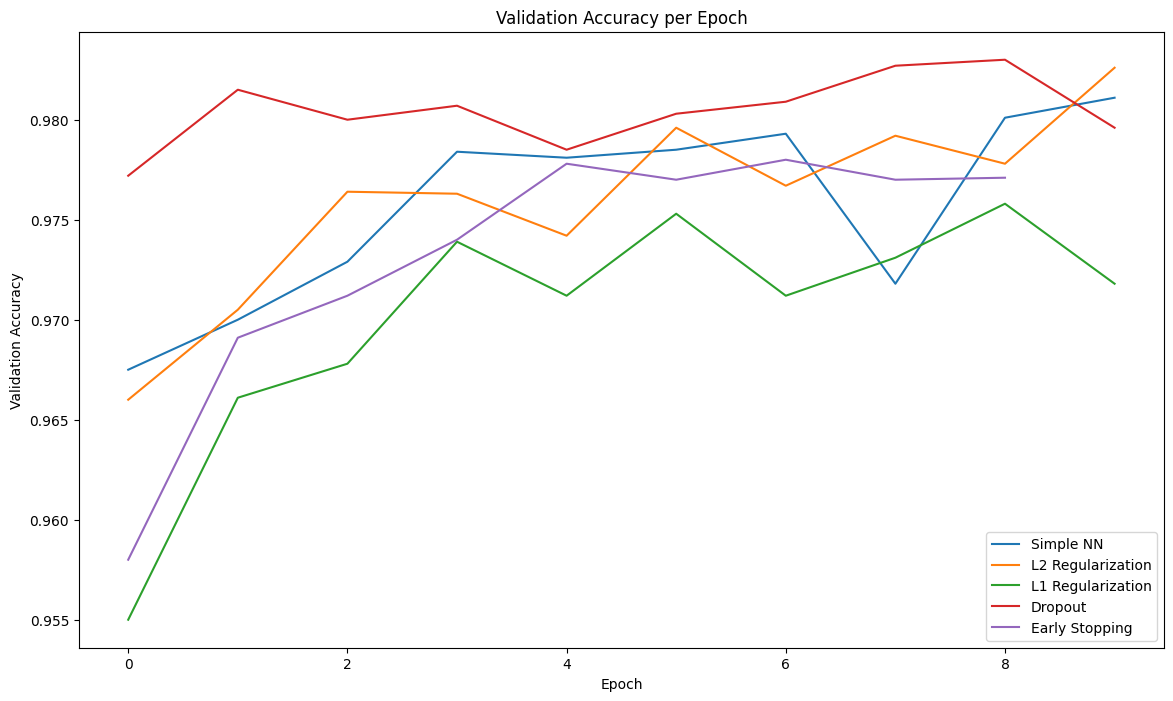

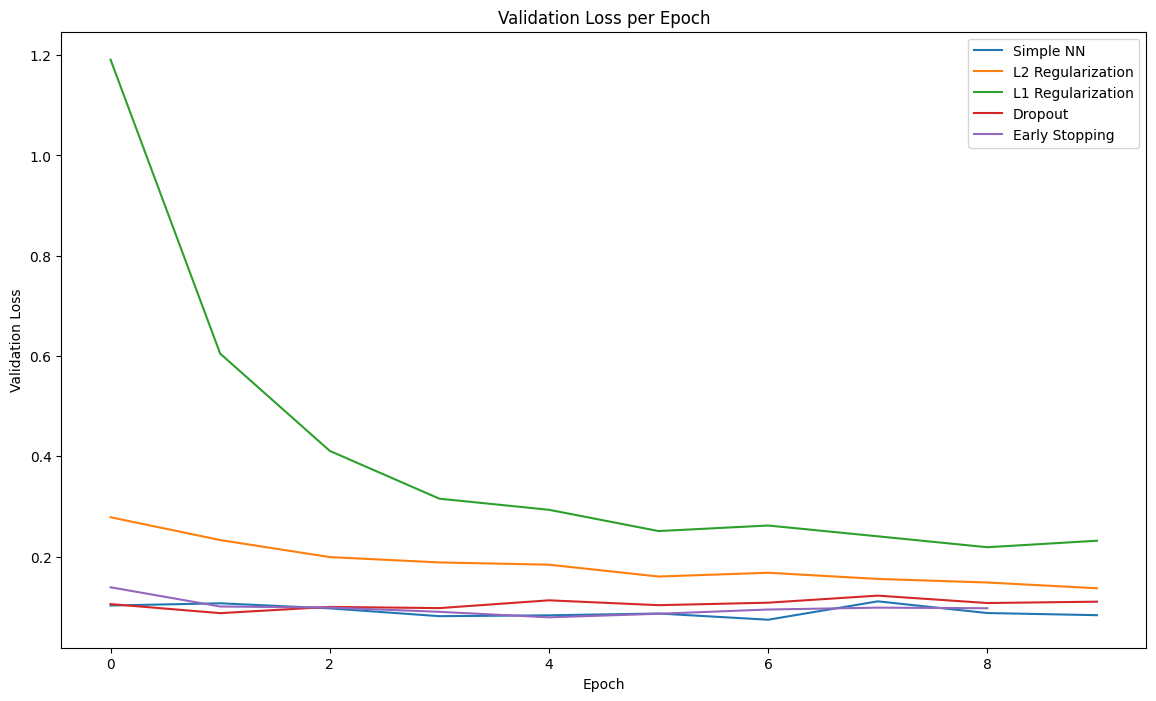

In [31]:
# Display results
results = {
    "Simple NN": history_simple.history,
    "L2 Regularization": history_l2.history,
    "L1 Regularization": history_l1.history,
    "Dropout": history_dropout.history,
    "Early Stopping": history_early_stopping.history
}

# Plot accuracy for each model
plt.figure(figsize=(14, 8))
for key in results.keys():
    plt.plot(results[key]['val_accuracy'], label=key)
plt.title('Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

# Plot loss for each model
plt.figure(figsize=(14, 8))
for key in results.keys():
    plt.plot(results[key]['val_loss'], label=key)
plt.title('Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

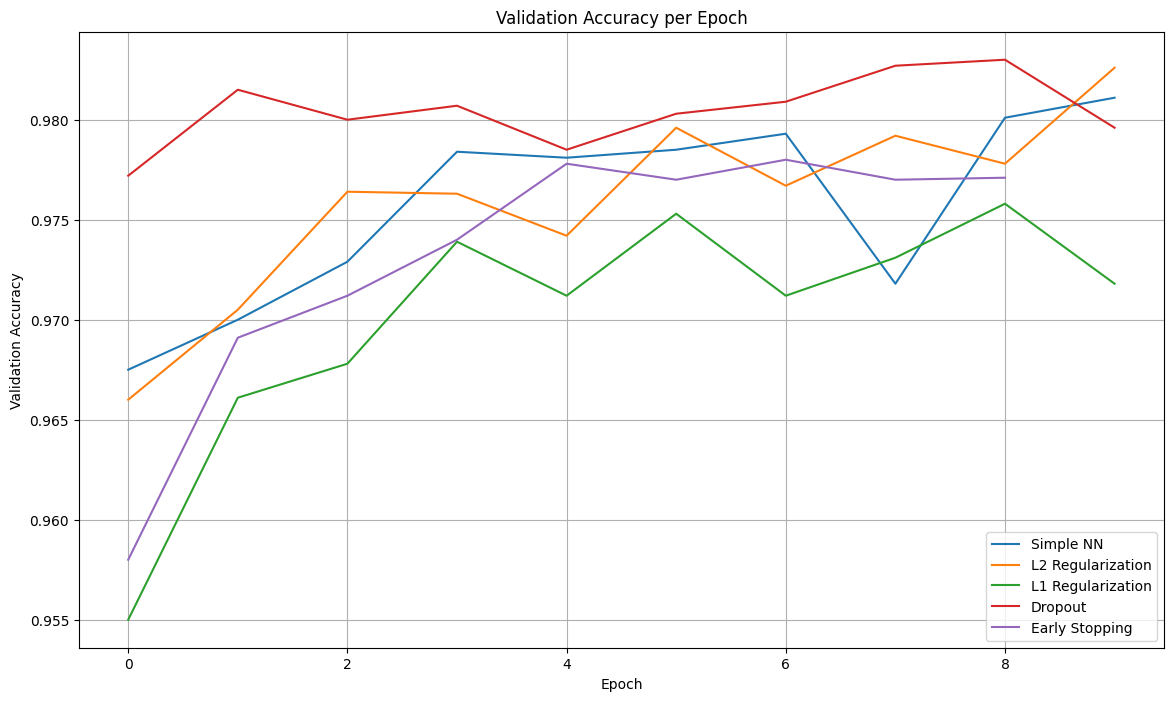

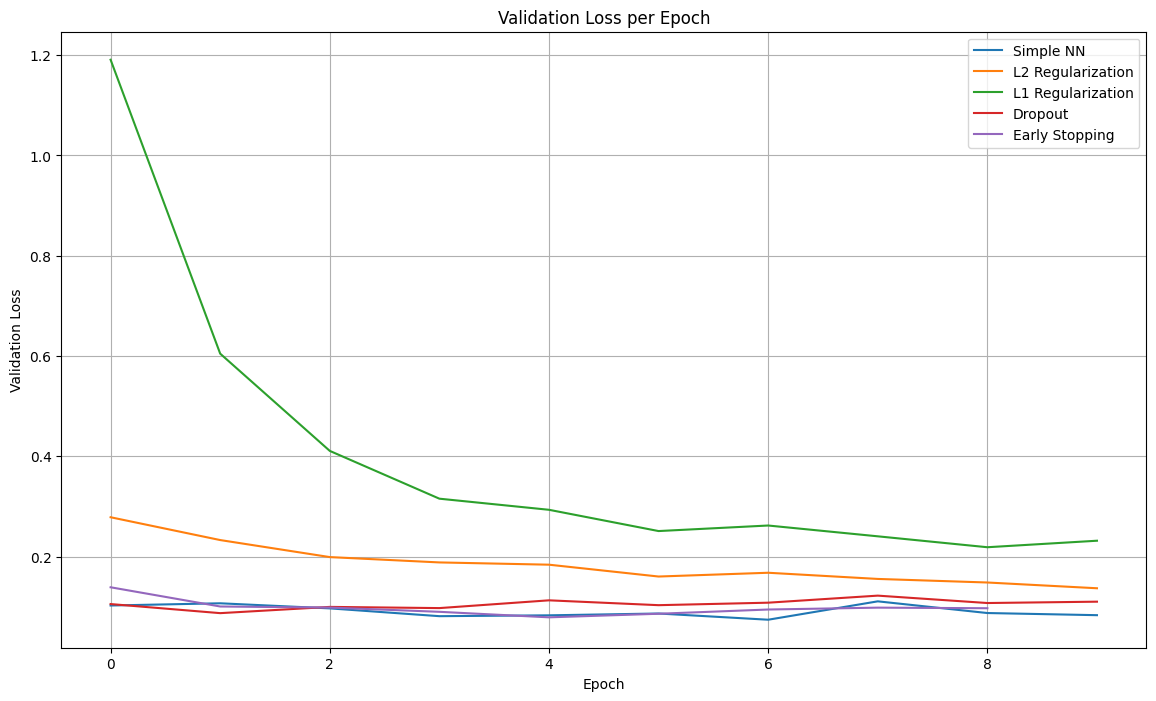

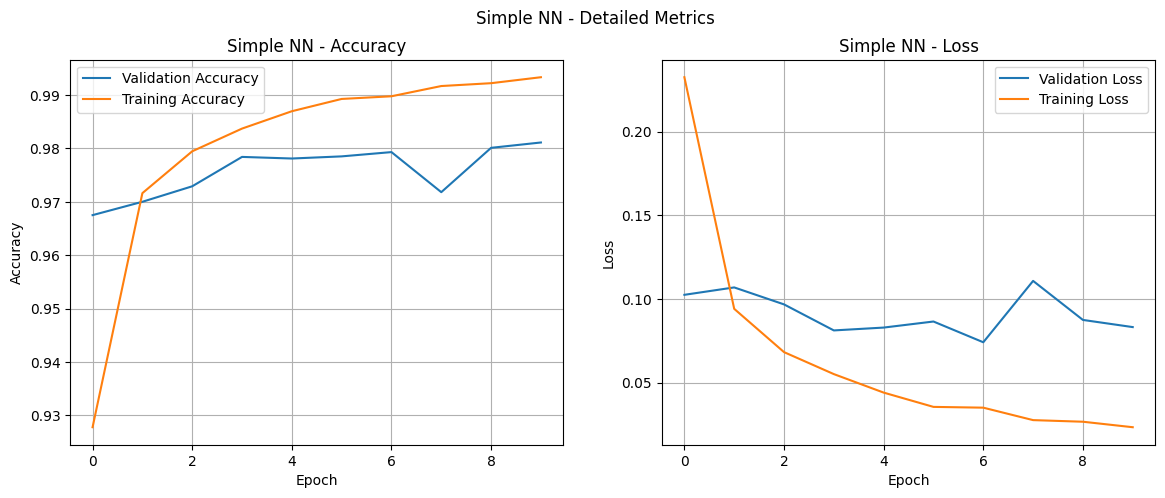

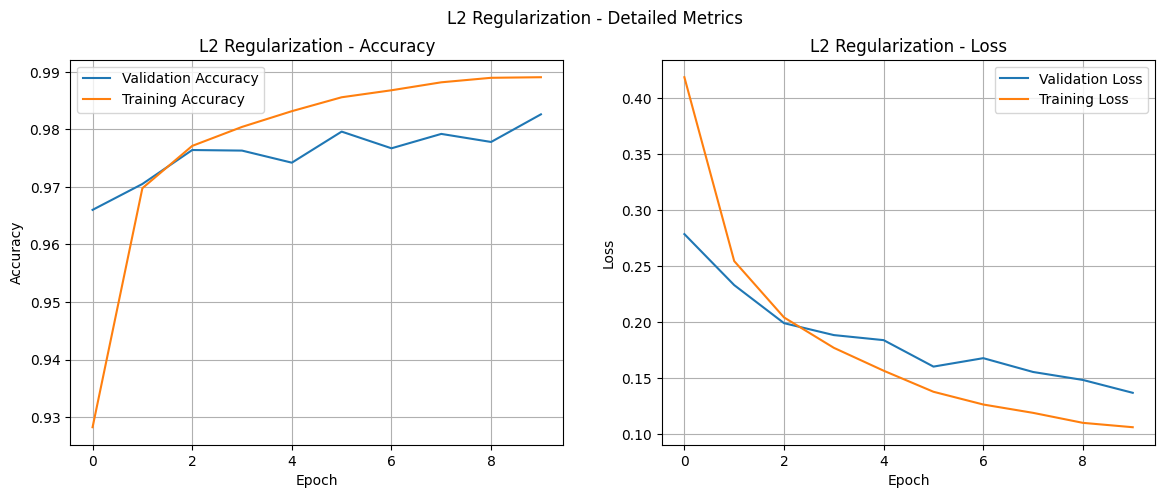

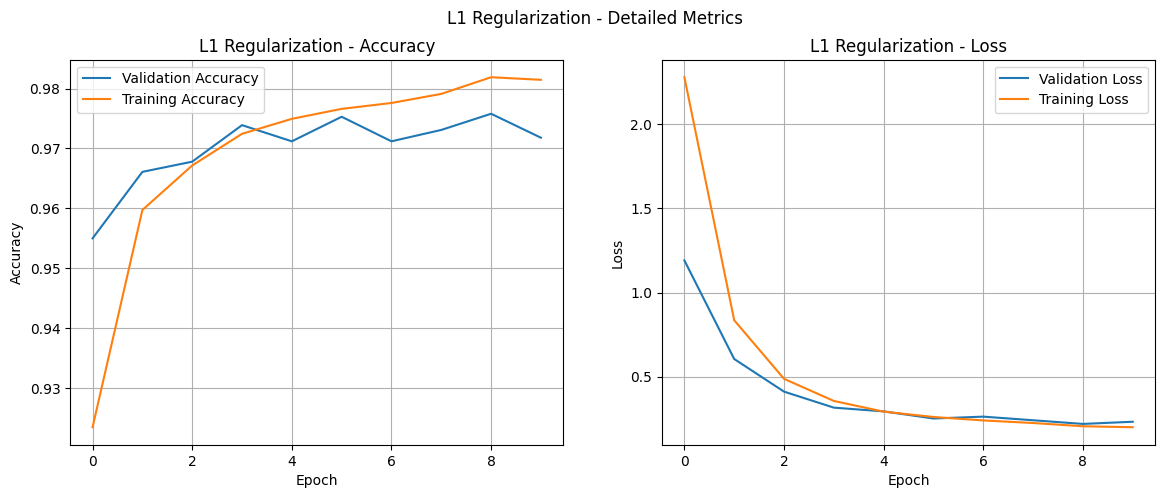

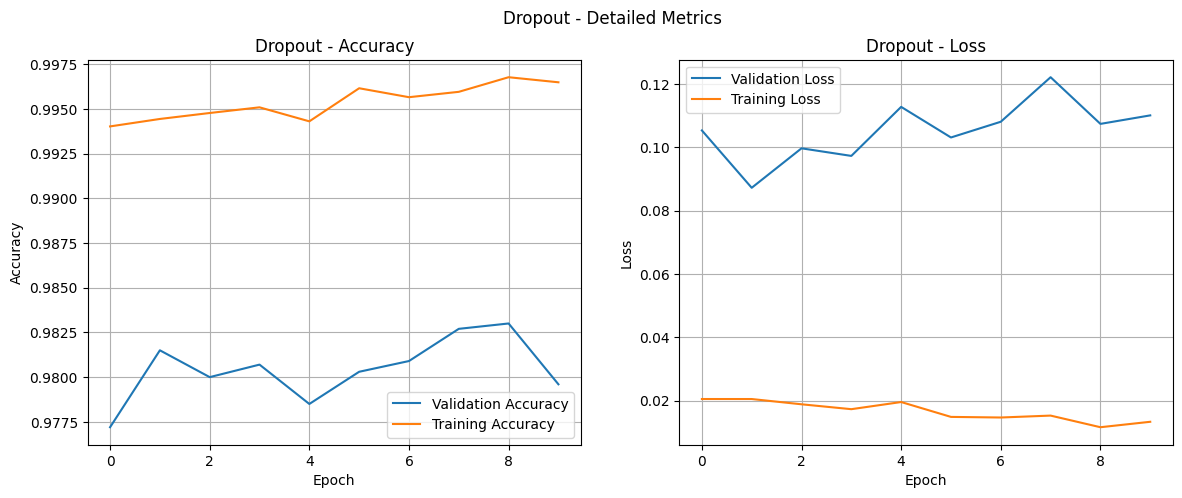

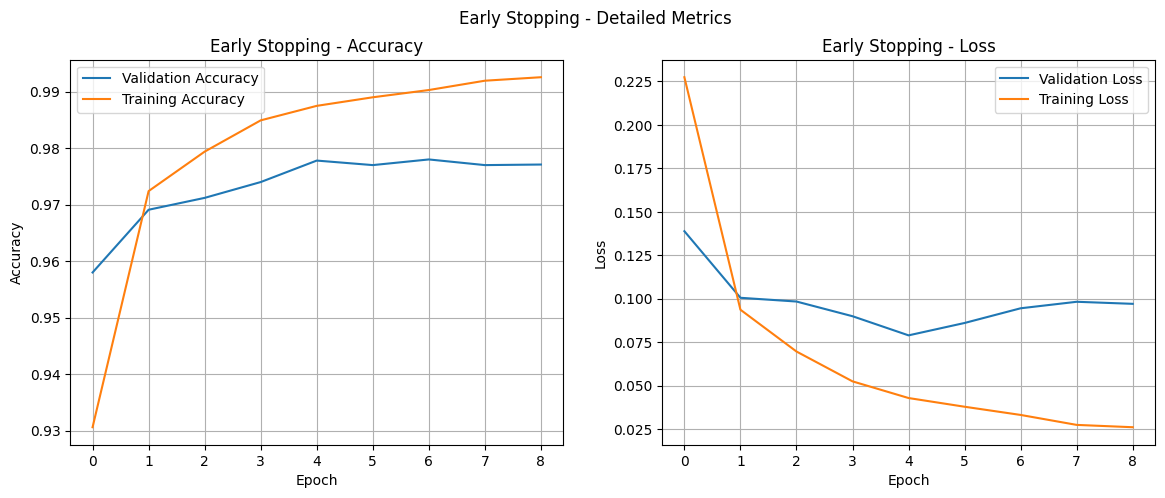

In [32]:
# Plot accuracy for each model
plt.figure(figsize=(14, 8))
for key in results.keys():
    plt.plot(results[key]['val_accuracy'], label=key)
plt.title('Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot loss for each model
plt.figure(figsize=(14, 8))
for key in results.keys():
    plt.plot(results[key]['val_loss'], label=key)
plt.title('Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot detailed accuracy and loss for each model
for key in results.keys():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    ax1.plot(results[key]['val_accuracy'], label='Validation Accuracy')
    ax1.plot(results[key]['accuracy'], label='Training Accuracy')
    ax1.set_title(f'{key} - Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True)

    ax2.plot(results[key]['val_loss'], label='Validation Loss')
    ax2.plot(results[key]['loss'], label='Training Loss')
    ax2.set_title(f'{key} - Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)

    plt.suptitle(f'{key} - Detailed Metrics')
    plt.show()

In [33]:
model_elastic = Sequential([
    Dense(hidden1_num_units, input_dim=input_num_units, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001)),
    Dense(hidden2_num_units, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001)),
    Dense(hidden3_num_units, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001)),
    Dense(hidden4_num_units, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001)),
    Dense(hidden5_num_units, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001)),
    Dense(output_num_units, activation='softmax'),
])

model_elastic.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_elastic = model_elastic.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 24s 45ms/step - loss: 2.2407 - accuracy: 0.9209 - val_loss: 1.1282 - val_accuracy: 0.9512
Epoch 2/10
469/469 [==============================] - 22s 47ms/step - loss: 0.7946 - accuracy: 0.9593 - val_loss: 0.5766 - val_accuracy: 0.9627
Epoch 3/10
469/469 [==============================] - 20s 42ms/step - loss: 0.4782 - accuracy: 0.9662 - val_loss: 0.4045 - val_accuracy: 0.9701
Epoch 4/10
469/469 [==============================] - 22s 47ms/step - loss: 0.3578 - accuracy: 0.9713 - val_loss: 0.3355 - val_accuracy: 0.9684
Epoch 5/10
469/469 [==============================] - 20s 44ms/step - loss: 0.3010 - accuracy: 0.9740 - val_loss: 0.2831 - val_accuracy: 0.9755
Epoch 6/10
469/469 [==============================] - 22s 48ms/step - loss: 0.2627 - accuracy: 0.9768 - val_loss: 0.2642 - val_accuracy: 0.9730
Epoch 7/10
469/469 [==============================] - 20s 44ms/step - loss: 0.2413 - accuracy: 0.9785 - val_loss: 0.2543 - val_accuracy:

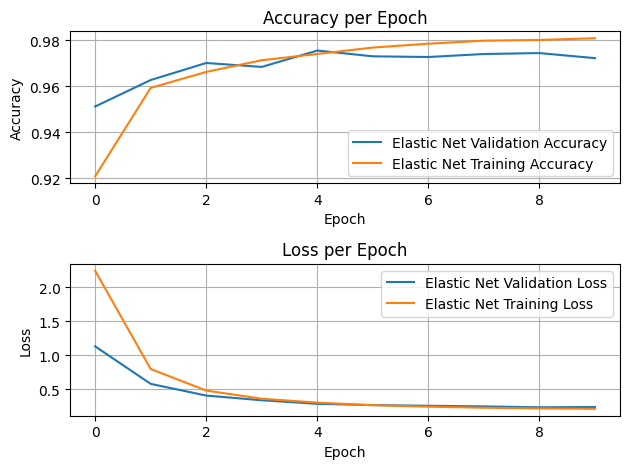

In [34]:
plt.subplot(2, 1, 1)
plt.plot(history_elastic.history['val_accuracy'], label='Elastic Net Validation Accuracy')
plt.plot(history_elastic.history['accuracy'], label='Elastic Net Training Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)


plt.subplot(2, 1, 2)
plt.plot(history_elastic.history['val_loss'], label='Elastic Net Validation Loss')
plt.plot(history_elastic.history['loss'], label='Elastic Net Training Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [35]:

import keras.backend as K
from keras.layers import Lambda, Dense

In [36]:
def inverted_dropout(x, dropout_rate=0.5):
    retain_prob = 1 - dropout_rate
    x = K.dropout(x, level=dropout_rate)
    x /= retain_prob
    return x

model_inverted_dropout = Sequential([
    Dense(hidden1_num_units, input_dim=input_num_units, activation='relu'),
    Lambda(inverted_dropout),
    Dense(hidden2_num_units, activation='relu'),
    Lambda(inverted_dropout),
    Dense(hidden3_num_units, activation='relu'),
    Lambda(inverted_dropout),
    Dense(hidden4_num_units, activation='relu'),
    Lambda(inverted_dropout),
    Dense(hidden5_num_units, activation='relu'),
    Lambda(inverted_dropout),
    Dense(output_num_units, activation='softmax'),
])

model_inverted_dropout.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_inverted_dropout = model_inverted_dropout.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 22s 43ms/step - loss: 1.5956 - accuracy: 0.5284 - val_loss: 0.5904 - val_accuracy: 0.8308
Epoch 2/10
469/469 [==============================] - 22s 46ms/step - loss: 0.4714 - accuracy: 0.8715 - val_loss: 0.3869 - val_accuracy: 0.9016
Epoch 3/10
469/469 [==============================] - 20s 43ms/step - loss: 0.3414 - accuracy: 0.9100 - val_loss: 0.3545 - val_accuracy: 0.9101
Epoch 4/10
469/469 [==============================] - 22s 47ms/step - loss: 0.2975 - accuracy: 0.9226 - val_loss: 0.3019 - val_accuracy: 0.9275
Epoch 5/10
469/469 [==============================] - 22s 46ms/step - loss: 0.2679 - accuracy: 0.9316 - val_loss: 0.2814 - val_accuracy: 0.9364
Epoch 6/10
469/469 [==============================] - 23s 48ms/step - loss: 0.2521 - accuracy: 0.9373 - val_loss: 0.2689 - val_accuracy: 0.9369
Epoch 7/10
469/469 [==============================] - 22s 48ms/step - loss: 0.2377 - accuracy: 0.9415 - val_loss: 0.2515 - val_accuracy: